In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
dataframe = pandas.read_csv('../Datasets/AirPassengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset.shape

(141, 1)

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(141, 1)

In [5]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
print(train.shape)
test.shape

94 47
(94, 1)


(47, 1)

In [6]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    c = 0
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        #print(a)
        c+=1
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    #print(c)
    return numpy.array(dataX), numpy.array(dataY)


In [7]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)


(92, 1)
(92,)
(45, 1)
(45,)


In [8]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)


(92, 1, 1)
(92,)
(45, 1, 1)
(45,)


In [9]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

2023-04-19 11:17:10.485800: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-19 11:17:10.531702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-19 11:17:10.531764: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-19 11:17:10.532826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

Epoch 1/100


2023-04-19 11:17:14.576443: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-04-19 11:17:15.773191: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f7214f6a420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-19 11:17:15.773243: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-04-19 11:17:15.806263: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-19 11:17:16.105548: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-19 11:17:16.180006: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


92/92 - 4s - loss: 0.0404 - accuracy: 0.0109 - 4s/epoch - 46ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0199 - accuracy: 0.0109 - 437ms/epoch - 5ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0150 - accuracy: 0.0109 - 423ms/epoch - 5ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0136 - accuracy: 0.0109 - 413ms/epoch - 4ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0127 - accuracy: 0.0109 - 415ms/epoch - 5ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0118 - accuracy: 0.0109 - 445ms/epoch - 5ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0108 - accuracy: 0.0109 - 432ms/epoch - 5ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0099 - accuracy: 0.0109 - 427ms/epoch - 5ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0088 - accuracy: 0.0109 - 434ms/epoch - 5ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0079 - accuracy: 0.0109 - 428ms/epoch - 5ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0071 - accuracy: 0.0109 - 468ms/epoch - 5ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0062 - accuracy: 0.0109 - 440ms/epoch - 5ms/step
Epoch 13/100
92/92 - 0s - l

Epoch 100/100
92/92 - 0s - loss: 0.0019 - accuracy: 0.0109 - 460ms/epoch - 5ms/step


In [10]:
trainPredict = model.predict(trainX)
#print(trainPredict)
testPredict = model.predict(testX)
#print([trainY])
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 5ms/step
Train Score: 22.46 RMSE
Test Score: 45.15 RMSE


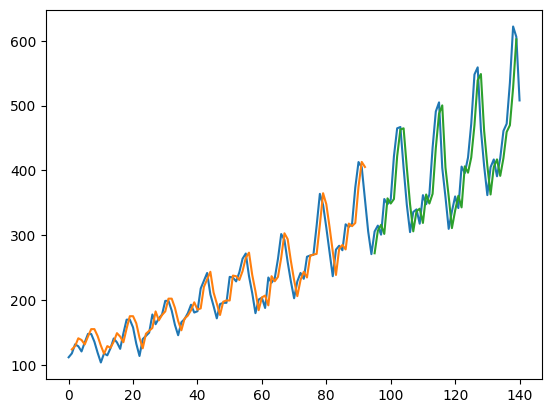

In [11]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()